## Melbourne Housing Data

Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
melbourne = pd.read_csv("melbourne.csv")

In [3]:
melbourne.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,03-09-2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,03-12-2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,04-02-2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,04-02-2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,04-03-2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


#### Dimensionality Check

In [4]:
melbourne.shape

(23547, 21)

In [5]:
melbourne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23547 entries, 0 to 23546
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         23547 non-null  object 
 1   Address        23547 non-null  object 
 2   Rooms          23547 non-null  int64  
 3   Type           23547 non-null  object 
 4   Price          18396 non-null  float64
 5   Method         23547 non-null  object 
 6   SellerG        23547 non-null  object 
 7   Date           23547 non-null  object 
 8   Distance       23546 non-null  float64
 9   Postcode       23546 non-null  float64
 10  Bedroom2       19066 non-null  float64
 11  Bathroom       19063 non-null  float64
 12  Car            18921 non-null  float64
 13  Landsize       17410 non-null  float64
 14  BuildingArea   10018 non-null  float64
 15  YearBuilt      11540 non-null  float64
 16  CouncilArea    15656 non-null  object 
 17  Lattitude      19243 non-null  float64
 18  Longti

#### Identifying missing Value

In [6]:
melbourne.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             5151
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          4481
Bathroom          4484
Car               4626
Landsize          6137
BuildingArea     13529
YearBuilt        12007
CouncilArea       7891
Lattitude         4304
Longtitude        4304
Regionname           1
Propertycount        1
dtype: int64

In [7]:
melbourne.isna().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price             True
Method           False
SellerG          False
Date             False
Distance          True
Postcode          True
Bedroom2          True
Bathroom          True
Car               True
Landsize          True
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude         True
Longtitude        True
Regionname        True
Propertycount     True
dtype: bool

In [8]:
round((melbourne.isna().sum()/len(melbourne))*100, 2)

Suburb            0.00
Address           0.00
Rooms             0.00
Type              0.00
Price            21.88
Method            0.00
SellerG           0.00
Date              0.00
Distance          0.00
Postcode          0.00
Bedroom2         19.03
Bathroom         19.04
Car              19.65
Landsize         26.06
BuildingArea     57.46
YearBuilt        50.99
CouncilArea      33.51
Lattitude        18.28
Longtitude       18.28
Regionname        0.00
Propertycount     0.00
dtype: float64

In [9]:
melbourne.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [10]:
numeric_features = melbourne.select_dtypes(include=[np.number])
numeric_features.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,NaN,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,-37.8014,144.9958,4019.0
1,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,-37.7996,144.9984,4019.0
2,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
3,3,NaN,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,-37.8114,145.0116,4019.0
4,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0


In [11]:
object_features = melbourne.select_dtypes(include=[np.object])
object_features.head()

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,68 Studley St,h,SS,Jellis,03-09-2016,Yarra,Northern Metropolitan
1,Abbotsford,85 Turner St,h,S,Biggin,03-12-2016,Yarra,Northern Metropolitan
2,Abbotsford,25 Bloomburg St,h,S,Biggin,04-02-2016,Yarra,Northern Metropolitan
3,Abbotsford,18/659 Victoria St,u,VB,Rounds,04-02-2016,Yarra,Northern Metropolitan
4,Abbotsford,5 Charles St,h,SP,Biggin,04-03-2017,Yarra,Northern Metropolitan


In [12]:
melbourne.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,23547.000000,1.839600e+04,23546.000000,23546.000000,19066.000000,19063.000000,18921.000000,17410.000000,10018.000000,11540.000000,19243.000000,19243.000000,23546.000000
mean,2.976048,1.056697e+06,10.306515,3109.782893,2.951956,1.570897,1.626235,551.783458,154.527895,1964.636742,-37.812434,145.000287,7517.480591
std,0.974501,6.419217e+05,6.016318,94.522190,0.996032,0.712684,0.974048,3544.288014,462.535765,37.595504,0.079926,0.106071,4414.995634
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.184180,144.431620,129.000000
25%,2.000000,6.330000e+05,6.200000,3047.000000,2.000000,1.000000,1.000000,181.000000,95.000000,1940.000000,-37.859300,144.939300,4385.000000
50%,3.000000,8.800000e+05,9.500000,3101.000000,3.000000,1.000000,2.000000,448.000000,129.000000,1970.000000,-37.809700,145.004300,6567.000000
75%,4.000000,1.302000e+06,13.000000,3150.000000,4.000000,2.000000,2.000000,656.000000,180.000000,2000.000000,-37.759800,145.063100,10331.000000
max,12.000000,9.000000e+06,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.407580,145.526350,21650.000000


#### Numerical Data

In [13]:
melbourne["Rooms"].max()  #min(), max(), count(), sum(), mean(), median()

12

#### Categorical Data

In [14]:
melbourne["Type"].value_counts()
melbourne["Suburb"].value_counts().sort_values(ascending = False)

Reservoir         629
Bentleigh East    429
Richmond          416
Glen Iris         378
Kew               357
                 ... 
Bacchus Marsh       1
Heatherton          1
Monbulk             1
croydon             1
Officer             1
Name: Suburb, Length: 336, dtype: int64

In [15]:
melbourne["Type"].value_counts()

h    15760
u     5280
t     2507
Name: Type, dtype: int64

#### Correlation Studies

In [16]:
corr_matrix = numeric_features.corr()

corr_matrix["Price"].sort_values(ascending = False)

Price            1.000000
Rooms            0.496430
Bedroom2         0.474864
Bathroom         0.463762
Car              0.237924
Longtitude       0.196774
Postcode         0.098790
BuildingArea     0.094342
Landsize         0.037514
Propertycount   -0.051254
Distance        -0.169779
Lattitude       -0.203864
YearBuilt       -0.324032
Name: Price, dtype: float64

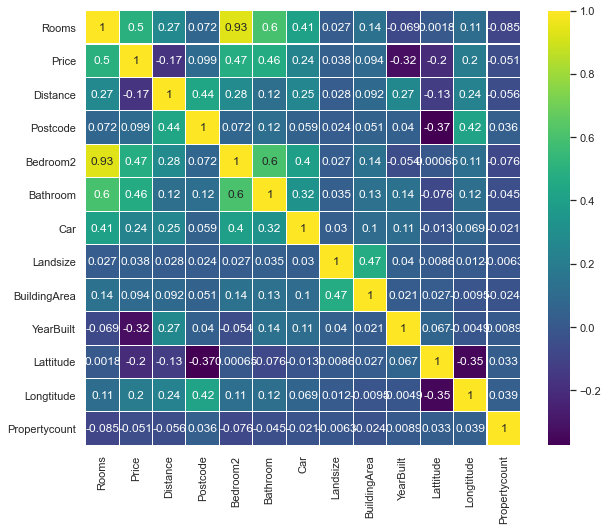

In [17]:
plt.figure(figsize= (10,8))

sns.heatmap(corr_matrix, linewidths=0.01,square=True,annot=True,
            cmap='viridis',linecolor="white")

#### Histogram

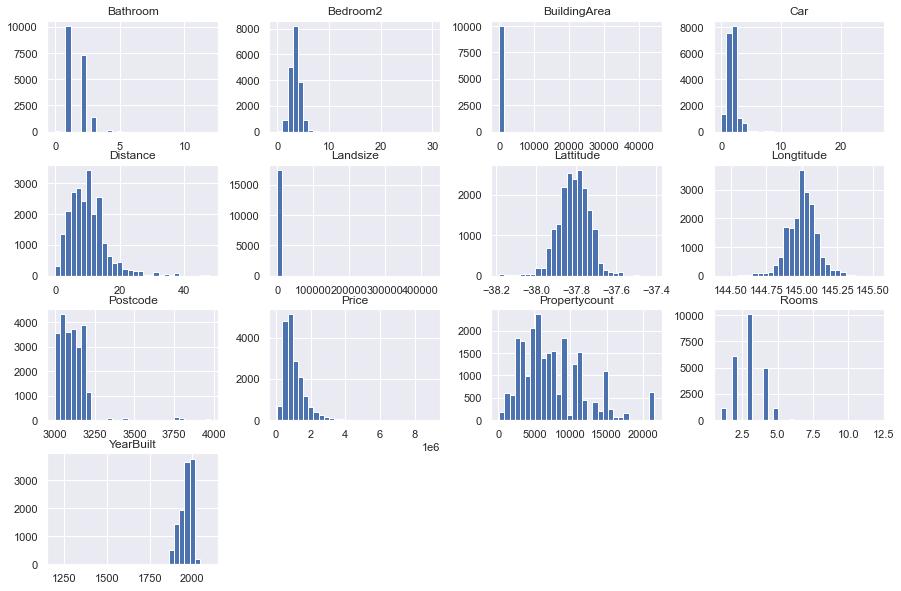

In [18]:
numeric_features.hist(bins =30, figsize=(15,10))
plt.show();

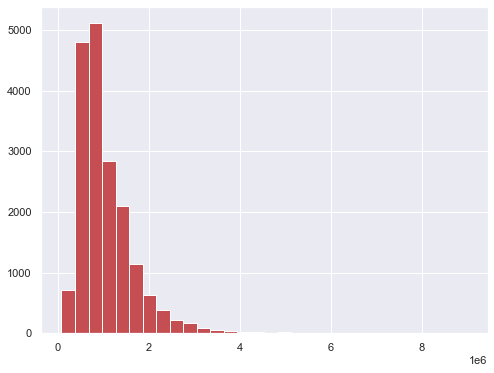

In [26]:
x1 = numeric_features["Price"].values
x2 = numeric_features["Rooms"].values
plt.figure(figsize=(8,6))
plt.hist(x1, bins=30, color = "r")
plt.show()

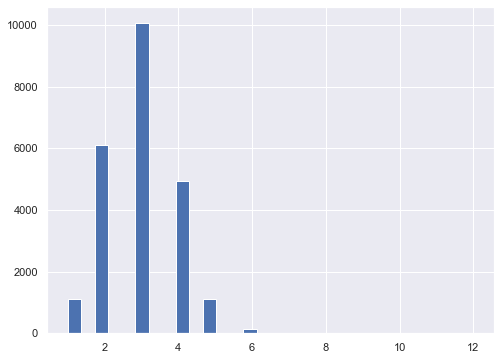

In [32]:
plt.figure(figsize=(8,6))
plt.hist(x2, bins=30, color = "b")

plt.show()

### Scatter Plot (Geoplotting)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


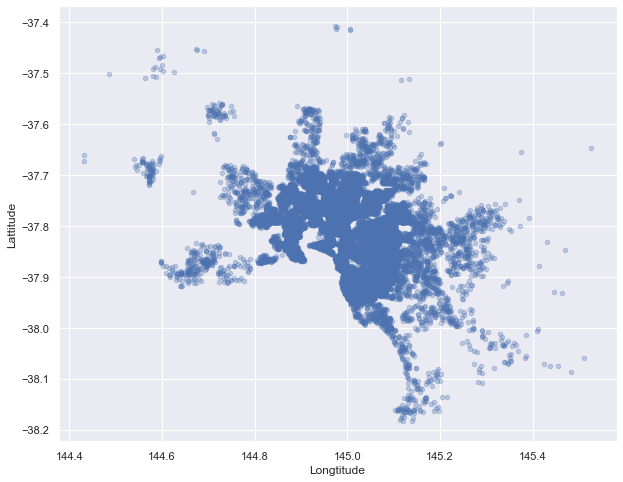

In [33]:
melbourne.plot(kind="scatter",x="Longtitude",y="Lattitude", 
                  alpha= 0.3, figsize=(10,8), sharex=False)
plt.show();

<Figure size 1152x720 with 0 Axes>

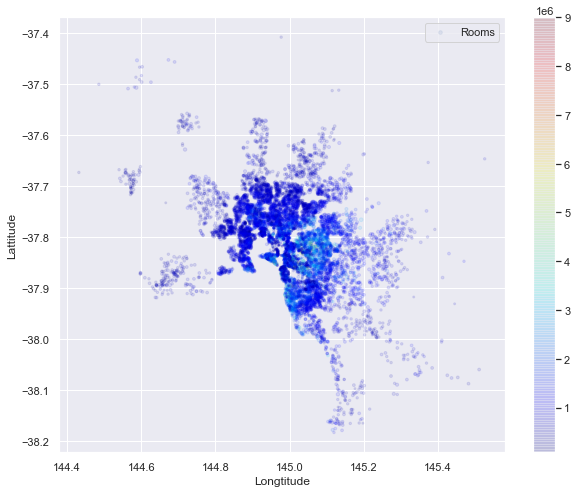

In [22]:
plt.figure(figsize= (16,10))
melbourne.plot(kind="scatter",x="Longtitude",y="Lattitude", alpha=0.1,
                      s = melbourne["Rooms"]*2, label="Rooms", 
                      figsize=(10,8), c = melbourne["Price"], 
                      cmap=plt.get_cmap("jet") ,colorbar=True, sharex=False)
plt.legend()
plt.show();

### Joint Plot

<Figure size 1296x864 with 0 Axes>

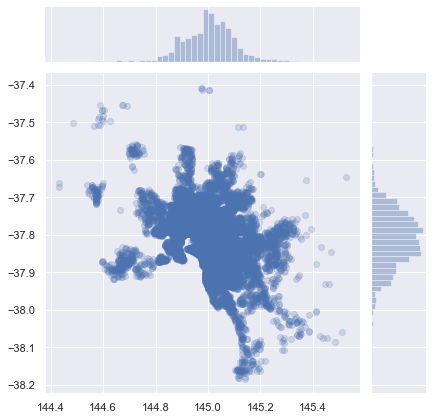

In [35]:
plt.figure(figsize= (18,12))
x = melbourne["Longtitude"].values
y = melbourne["Lattitude"].values

s = sns.jointplot(x, y, alpha = 0.2, data = melbourne)
plt.show()

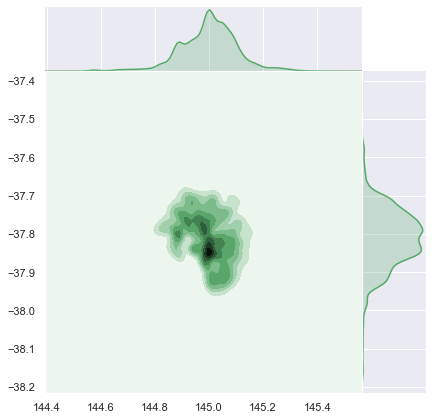

In [37]:
ax = sns.jointplot(x, y, data = melbourne, kind="kde", space=0, color="g")
plt.show();

### Categorical Plotting

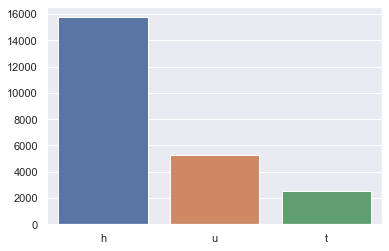

In [38]:
data1 = melbourne["Type"].value_counts()
ax = sns.barplot(x=data1.index, y = data1.values)

Text(0.5, 1.0, 'Type')

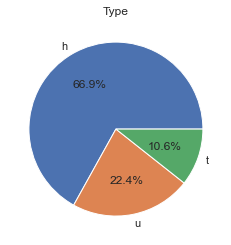

In [39]:
plt.pie(data1, labels = data1.index , autopct='%1.1f%%')
plt.title("Type")

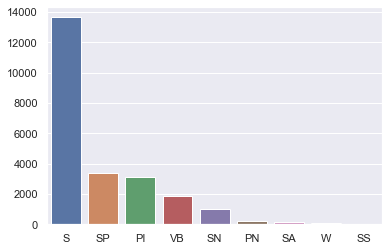

In [40]:
data2 = melbourne["Method"].value_counts()
bx = sns.barplot(x=data2.index, y = data2.values)

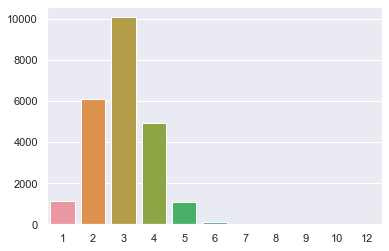

In [42]:
data3 = melbourne["Rooms"].value_counts()
cx = sns.barplot(x=data3.index, y = data3.values)